<h1>Gradient Descent Algorithm</h1>

In this notebook, we implement a gradient descent algorithm to minimize a cost function for a univariate regression equation.  We first introduce a general example of a gradient descent algorithm, and then provide details on its implementation to minimize a regression cost function (i.e. the sum of squared errors).  The code requires the following imports:

In [2]:
# Vectors
import numpy as np
from numpy.random import normal

# Data Manipulation
import pandas as pd

# Figures / Graphs
%matplotlib inline
from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter

<h3>General Gradient Descent Algorithm</h3>

A gradient descent algorithm is used in minmizing a function with an arbitrary number of parameters.  For example, let $J(\theta_{0}, ..., \theta_{n})$ be a function to minimize with parameters $\theta_{0}, ..., \theta_{n}$ such that $\theta_{i} \in \mathbb{R}$ for $i\in{ \{0, ..., n\}}$.

To obtain the $\theta$s that minimize the function $J(\theta_{0}, ..., \theta_{n})$ we use an iterative process,  simultaniously updating the paraemters $\theta_{0}, ..., \theta_{n}$, until $J(\theta_{0}, ..., \theta_{n})$ converges to a local minimum.  We calculate $\theta_{j}$ for $j=1, ...,n$ in each iteration, updating the previous iteration by subtracting $\alpha\frac{\partial J(\theta_{0}, ..., \theta_n)}{\partial \theta_{j}}$ from the previous $\theta_{j}$, where $\alpha$ is the learning rate.

$$\theta_{j} := \theta_{j} - \alpha\frac{\partial J(\theta_{0}, ..., \theta_{n})}{\partial \theta_{j}}$$


We can also express the general equation using vector notation.  Let $\theta$ be a vector of the previous iterative process (i.e. before the simultaneous update) and $\theta_\Delta$ be the partial derivative of $J(\theta_{0}, ..., \theta_{n})$ with respect to its position in the vector (starting index of zero):

$$\theta_\Delta=\begin{bmatrix} 
\frac{\partial J(\theta_{0}, ..., \theta_{n})}{\partial \theta_0} \\ 
\frac{\partial J(\theta_{0}, ..., \theta_{n})}{\partial \theta_1} \\ 
\frac{\partial J(\theta_{0}, ..., \theta_{n})}{\partial \theta_2} \\
. \\ 
. \\ 
\frac{\partial J(\theta_{0}, ..., \theta_{n})}{\partial \theta_n}
\end{bmatrix}
\theta=\begin{bmatrix} 
\theta_0 \\
\theta_1 \\
\theta_2 \\
. \\ 
. \\
\theta_n
\end{bmatrix}$$

Then:
$$\theta := \theta + (-\alpha\theta_\Delta)$$

<h3>Univariate Regression</h3>

We now turn our attention to a simple example of using a gradient descent algorithm to minimize the sum of squared errors cost function in a univariate regression model.

A univariate regression model is used to understand the linear relationship between a dependent variable ($y$) and independent variable ($x$):

$$y = \beta_0 + \beta_1x_1$$

We slightly modify this basic equation to allow for easier implementation in Python ($x_0=1$):

$$y = \beta_0x_0 +\beta_1x_1 = \beta_0 + \beta_1x_1$$ 

We can also express the general univariate regression equation using matricies:

$$ y = X^{T} \beta$$

Where 

$$\beta=\begin{bmatrix} 
\beta_0 \\
\beta_1 
\end{bmatrix}
X=\begin{bmatrix} 
x_0 \\
x_1
\end{bmatrix}$$

The regression equation is sometime considered a hypothesis function that relates $\beta_0$ and $\beta_1$ to $y$ for a given $x_1$ and is denoted $y = h_{\beta}(x_1)$.

Estimation of the regression equation requires using a <b>cost function</b> to evaluate different potential estimations of $\beta$s.  The most common regression cost function is called the sum of squared errors (denoted $\epsilon$).  The cost function for the univariate regression is below:

$$\epsilon(\beta_0, \beta_1) = \frac{1}{2n}\sum\limits_{i=1}^n (y^{(i)}- \hat{y^{(i)}})^2  = \frac{1}{2n}\sum\limits_{i=1}^n (y^{(i)} - \beta_0x_0^{(i)} - \beta_1x_1^{(i)})^2$$

Where n is the number of observations in the training data set and $\hat{y}$ is the estimated y value for a given set of $\beta$s generated by evaluating the hypothsis function.  Ordinary least squares (OLS) is a method for estimating the regression equation that minimizes the cost function $\epsilon$.  To begin, we generate some dummy data and graph it:


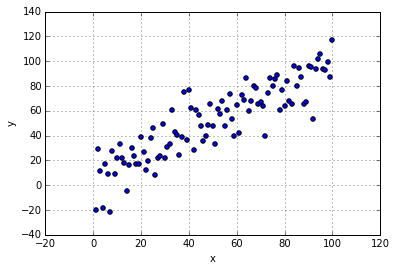

In [3]:
x = np.array(xrange(1, 101), dtype='f')
y = np.array(normal(0, 15, 100) + xrange(1, 101), dtype='f')
pd.DataFrame(zip(x,y), columns=['x', 'y']).plot(x='x', y='y', kind='scatter')
plt.show()

We then derive the partial derivatives of the cost function for use in the gradient descent algorithm:

$$\epsilon(\beta_0, \beta_1) = \frac{1}{2n}\sum\limits_{i=1}^n (y^{(i)} - \beta_0x_0^{(i)} - \beta_1x_1^{(i)})^2$$

$$\frac{\partial\epsilon(\beta_0, \beta_1)}{\partial \beta_0} = -\frac{1}{n}\sum\limits_{i=1}^n (y^{(i)} - \beta_0x_0^{(i)} - \beta_1x_1^{(i)})x_0^{(i)}$$

$$\frac{\partial\epsilon(\beta_0, \beta_1)}{\partial \beta_1} = -\frac{1}{n}\sum\limits_{i=1}^n (y^{(i)} - \beta_0x_0^{(i)} - \beta_1x_1^{(i)})x_1^{(i)}$$

Using Python we define our hypothesis function, cost function (sum of residuals squarred), and partial derivative functions:

In [4]:
def hypothesis(betas, xs):
    # y = B_0 x_0 + B_1 x_1; x_0 = 1
    return np.sum(betas * xs, axis=1)

def cost(betas, xs, ys):
    # add ones column to get [x_0, x_1] vector
    xs = np.array(zip(np.ones(len(xs)), xs)) 
    # cost = (1/2n) SUM [ y - B_0 x_0 - B_1 x_1)^2 ]
    return (1.0/(2.0*len(ys))) * np.sum( ( ys - hypothesis(betas, xs) )**2 )

def cost_deriv(betas, xs, ys):
    xs = np.array(zip(np.ones(len(xs)), xs)) 
    return (-1.0/len(ys)) * np.sum( ( ys - hypothesis(betas, xs) ) * np.transpose(xs), axis=1)


We can graph the cost function for various $\beta_0$ and $\beta_1$ values.  Notice, the function is convex which guarantees that the local minimum is a global minimum.

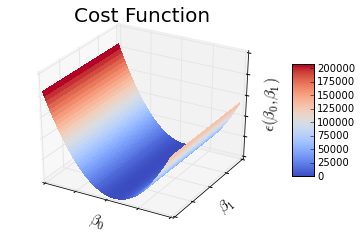

In [5]:
# Setup 3D Plotting
fig = plt.figure()
ax = fig.gca(projection='3d')
beta_0 = np.arange(-5, 5, 0.25)

# Generate Betas and Costs Metrics
beta0 = np.arange(-10, 10, 0.25)
beta1 = np.arange(-10, 10, 0.25)
betas =  np.array( zip(beta0, beta1))
costs = np.array( [cost(b, x, y) for b in betas] )

# Format Axis
plt.title('Cost Function', fontsize=20)
ax.set_xlabel(r'$\beta_0$', fontsize=15)
ax.set_ylabel(r'$\beta_1$', fontsize=15)
ax.set_zlabel(r'$\epsilon(\beta_0, \beta_1)$', fontsize=15)
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.yaxis.set_major_formatter(plt.NullFormatter())
ax.zaxis.set_major_formatter(plt.NullFormatter())

# Create Graph
beta0, beta1 = np.meshgrid(beta0, beta1)
surf = ax.plot_surface(beta0, beta1, costs, 
                       rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

Using the vector notation and functions defined above, we implement the gradient descent algorithm.  The function takes a vector of dependent training variables ($x$) and independent training variables ($y$), a learning rate  ($\alpha$), and iteration variable (determines number of iterations to run before loop terminates).  

In [6]:
def gradient_descent(x, y, alpha, iterations):
    betas = np.zeros(2)
    
    # Lists for Graphs
    iteration_lst, cost_lst = [], []
    
    for i in range(0, iterations):

        betas = betas - ( alpha * cost_deriv(betas, x, y) )
        iteration_lst.append(i)
        cost_lst.append(cost(betas, x, y))
        
    plt.plot(iteration_lst, cost_lst)
    plt.title('Gradient Descent Convergence', fontsize=20)
    plt.xlabel(r'Number of Iterations', fontsize=15)
    plt.ylabel(r'$\epsilon(\beta_0, \beta_1)$', fontsize=20)
    return betas
        

B0: 0.0170909089086
B1: 1.00016656475


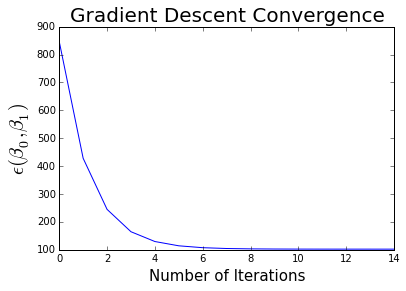

In [7]:
b0, b1 = map(str, gradient_descent(x, y, 0.0001, 15))
print 'B0: %s' % b0
print 'B1: %s' % b1

Thus, $\beta_0$ and $\beta_1$ converge at approximately 8 iterations with $\beta_0$ values close to zero and $\beta_1$ values close to one as expected from the dummy data. 